In [ ]:
# Import and creating some helper functions
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

11490434/11490434 [==============================] - 2s 0us/step


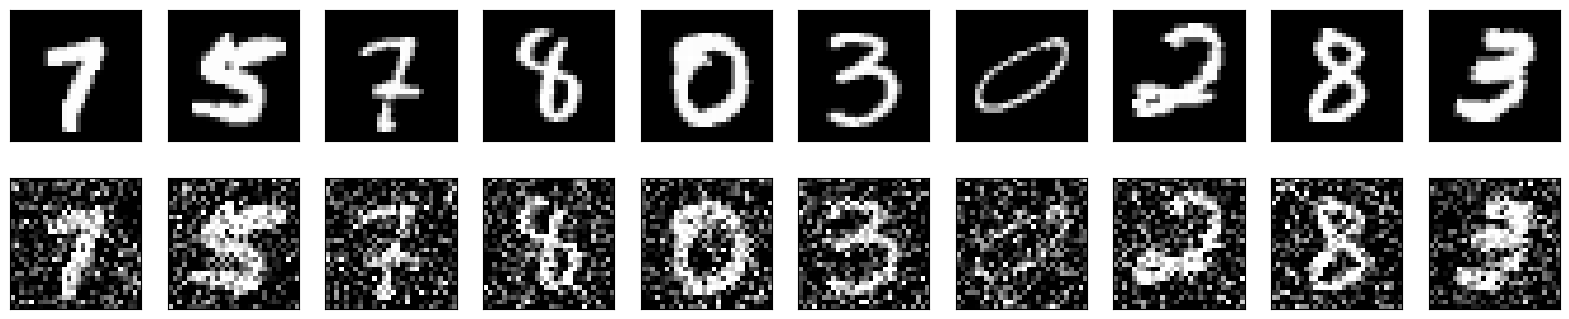

In [ ]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [ ]:
input = layers.Input(shape=(28,28,1))

x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)

x = layers.Conv2DTranspose(32, (3,3), strides=2,activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (3,3), strides=2,activation='relu', padding='same')(x)
x = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder =Model(input, x)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 32)       9248

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data,test_data)
)

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.1364 - val_loss: 0.0740
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0722 - val_loss: 0.0699
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0697 - val_loss: 0.0684
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0685 - val_loss: 0.0675
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0677 - val_loss: 0.0670
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0671 - val_loss: 0.0663
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0665 - val_loss: 0.0658
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0661 - val_loss: 0.0655
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0658 - val_loss: 0.0654
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0655 - val_loss: 0.0649

313/313 [==============================] - 1s 2ms/step


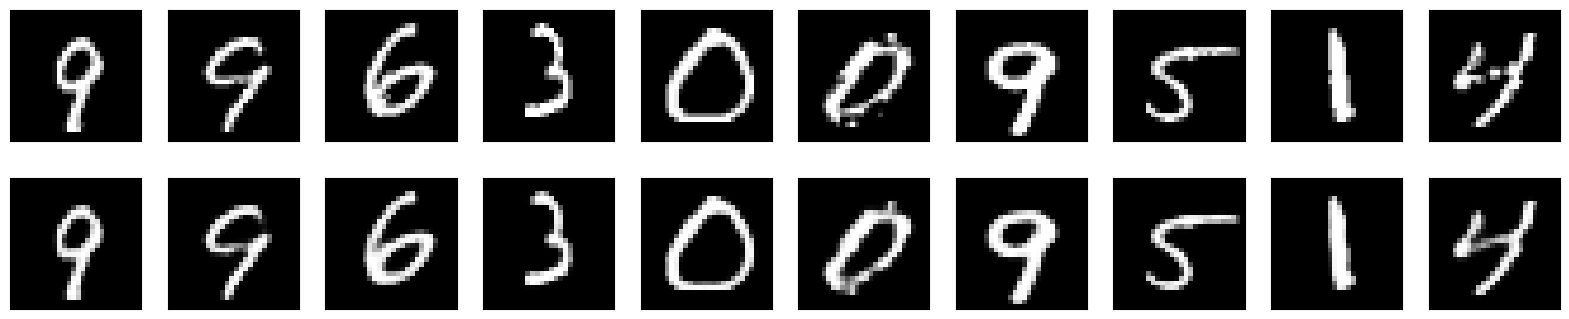

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data,test_data)
)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1026 - val_loss: 0.0948
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0941 - val_loss: 0.0923
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0924 - val_loss: 0.0912
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0914 - val_loss: 0.0903
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0907 - val_loss: 0.0897
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0900 - val_loss: 0.0891
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0895 - val_loss: 0.0889
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0891 - val_loss: 0.0883
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0887 - val_loss: 0.0880
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0884 - val_loss: 0.0876

313/313 [==============================] - 1s 3ms/step


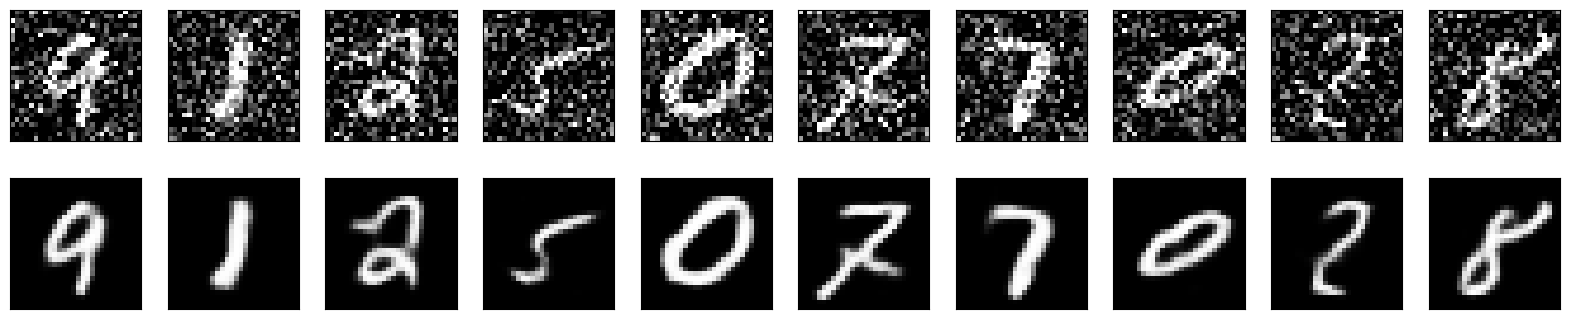

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)